In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import sqlite3
from collections import Counter
from datetime import datetime
import plotly.express as px

In [67]:
conn_tasks =  sqlite3.connect('../application.db')
tasks = pd.read_sql_query('SELECT * FROM tasks', conn_tasks)
workflow = pd.read_sql_query('SELECT * FROM workflow where action_is_active = 1', conn_tasks)

In [8]:
#Replacing True Status ids

In [9]:
def replace_statusid(data):
    all_statuses = []
    for index, row in data.iterrows():
        if type(id := row['status_ids']) == str:
            all_statuses.extend(list(map(lambda x: int(x.strip() or 0), id.split(','))))
        else:
            all_statuses.append(id)
    
    all_statuses = set(all_statuses)
    all_statuses.remove(0)    
    
    
    for index, row in data.iterrows():
        if row["for_all_statuses"] == 1:
            data.at[index, 'status_ids'] = ', '.join(list(map(lambda x: str(x), all_statuses)))

    print(data)

replace_statusid(workflow)

    action_id                      action_title  for_all_statuses  \
0          90                   Հանձնել առաքման                 0   
1          91     Պատրաստել միջանկյալ գրություն                 1   
2          93                       Վերադարձնել                 1   
3          94         Վերադարձնել վերախմբագրման                 0   
4          95                        Հետ կանչել                 1   
5          96            Փոխել փաստաթղթի տեսակը                 1   
6          97                        Տեղեկացնել                 1   
7          98               Խմբագրել հասցեատերը                 0   
8          99                            Ուղղել                 0   
9         100                Ուղարկել հաստատման                 0   
10        101                           Ստեղծել                 0   
11        102                Առաքել փաստաթուղթը                 0   
12        103                      Ստորագրված է                 0   
13        104                     

In [5]:
#Not Used Status_ids

In [6]:
def not_used_ststuses(task_data, workflow_data):

    workflow_dict = workflow_data.set_index('action_id')['status_ids'].to_dict()
    return workflow_dict
    # for index, row in workflow_data.iterrows():
    #     for i in workflow_dict:
    #         if row['action_id'] == workflow_dict[i]:
    #             workflow_dict[i] = workflow_data.loc[i, 'action_title']

    # return workflow_dict

not_used_ststuses(tasks, workflow)

{90: 44,
 91: '512, 513, 712, 393, 41, 43, 44, 45, 42, 46, 51, 339, 511',
 93: '512, 513, 712, 393, 41, 43, 44, 45, 42, 46, 51, 339, 511',
 94: '43, 44, 51, 339, 393, 712',
 95: '512, 513, 712, 393, 41, 43, 44, 45, 42, 46, 51, 339, 511',
 96: '512, 513, 712, 393, 41, 43, 44, 45, 42, 46, 51, 339, 511',
 97: '512, 513, 712, 393, 41, 43, 44, 45, 42, 46, 51, 339, 511',
 98: '41, 44, 45, 339, 512, 513',
 99: '41, 42, 43, 44, 45, 46, 51, 339, 393',
 100: '41, 43, 45, 339, 512, 513',
 101: 0,
 102: '44, 51',
 103: '41, 43, 45',
 104: '41, 43',
 507: 42,
 511: '41, 43, 45',
 580: '41, 43',
 660: '41, 43, 44, 45, 339, 512, 513',
 713: 43,
 798: '41, 42, 43, 44, 45, 46, 51, 339, 393',
 800: 42,
 836: '41, 45, 393',
 837: 393,
 839: 393,
 845: 44,
 854: '41, 42, 43, 44, 45, 46, 51, 339, 393',
 912: '41, 43',
 940: '512, 513, 712, 393, 41, 43, 44, 45, 42, 46, 51, 339, 511',
 1032: '41, 42, 43, 44, 45, 46, 51, 339, 393',
 1033: '41, 42, 43, 44, 45, 46, 51, 339, 393',
 1044: 43,
 1045: '511, 512',
 

In [7]:
#Bar chart about not used status_ids

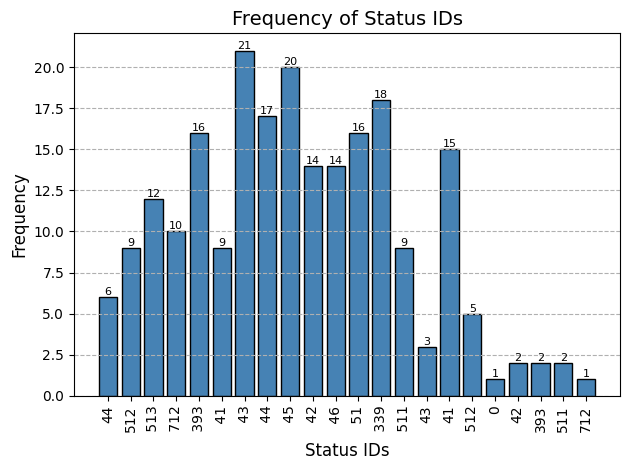

In [8]:
def not_used_ststuses(task_data, workflow_data):
    workflow_dict = workflow_data.set_index('action_id')['status_ids'].to_dict()

    status_ids = []
    for value in workflow_dict.values():
        if isinstance(value, str):
            status_ids.extend(value.split(','))
        else:
            status_ids.append(str(value))

    status_counts = dict(Counter(status_ids))
    unused_status_ids = list(filter(lambda status_id: status_counts[status_id] == 0, status_ids))

    x = list(status_counts.keys())
    y = list(status_counts.values())
    fig, ax = plt.subplots()

    bars = ax.bar(x, y, color='steelblue', edgecolor='black')

    for bar in bars:
        if bar.get_x() in unused_status_ids:
            bar.set_color('red')

    
    plt.xlabel('Status IDs', fontsize=12)
    plt.ylabel('Frequency', data = pd.DataFrame({'Action ID': list(average_durations.keys()), 'Average Duration (hours)': list(average_durations.values())})


plt.figure(figsize=(10, 6)) 


sns.barplot(x='Action ID', y='Average Duration (hours)', data=data)

plt.xlabel('Action ID')
plt.ylabel('Average Duration (hours)')
plt.title('Average Duration for Each Action ID')
plt.xticks(rotation=90)

plt.show()=12)
    plt.title('Frequency of Status IDs', fontsize=14)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=10)

    #Grid
    ax.grid(axis='y', linestyle='--')
    plt.tight_layout()

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, height,
                ha='center', va='bottom', fontsize=8)

    plt.show()

not_used_ststuses(tasks,workflow)

In [9]:
#Finding Action_ids Existing in Tasks But Not in Workflow

In [10]:
def not_used_actions(task_data, workflow_data):

    #Merging task and workflow data
    merged_df = pd.merge(task_data,workflow_data,how="left", on='action_id')

    #Printing NAN Action_titles
    nan_action_id = merged_df[merged_df['action_title'].isna()]
    return nan_action_id
            

not_used_actions(tasks, workflow)

,task_id,action_id,previous_status_id,next_status_id_x,previous_holder_id,previous_holder_title,next_holder_id,next_holder_title,action_performer_id,action_performer_title,action_date,action_title,for_all_statuses,action_is_active,status_ids,status_names,next_status_id_y,next_status_title
24,1484,92,43.0,43,384.0,Երևանի քաղաքապետարանի աշխատակազմի մշակույթի և ...,384.0,Երևանի քաղաքապետարանի աշխատակազմի մշակույթի և ...,384,Երևանի քաղաքապետարանի աշխատակազմի մշակույթի և ...,2022-04-04 17:15:00.377033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,2600,92,45.0,45,509.0,Երևանի քաղաքապետարանի աշխատակազմի հանրակրթությ...,509.0,Երևանի քաղաքապետարանի աշխատակազմի հանրակրթությ...,509,Երևանի քաղաքապետարանի աշխատակազմի հանրակրթությ...,2022-04-06 17:54:57.725813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,2600,92,45.0,45,509.0,Երևանի քաղաքապետարանի աշխատակազմի հանրակրթությ...,509.0,Երևանի քաղաքապետարանի աշխատակազմի հանրակրթությ...,509,Երևանի քաղաքապետարանի աշխատակազմի հանրակրթությ...,2022-04-07 17:28:22.195805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,2680,92,43.0,43,375.0,Երևանի քաղաքապետարանի աշխատակազմի մշակույթի և ...,375.0,Երևանի քաղաքապետարանի աշխատակազմի մշակույթի և ...,375,Երևանի քաղաքապետարանի աշխատակազմի մշակույթի և ...,2022-04-05 11:38:36.543407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2744,92,41.0,41,120.0,Երևանի քաղաքապետարանի աշխատակազմի առևտրի և ծառ...,120.0,Երևանի քաղաքապետարանի աշխատակազմի առևտրի և ծառ...,120,Երևանի քաղաքապետարանի աշխատակազմի առևտրի և ծառ...,2022-04-05 11:08:41.172744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745622,468380,242,126.0,41,418.0,Երևանի քաղաքապետարանի աշխատակազմի կազմակերպակա...,418.0,Երևանի քաղաքապետարանի աշխատակազմի կազմակերպակա...,418,Երևանի քաղաքապետարանի աշխատակազմի կազմակերպակա...,2022-12-12 17:27:09.655977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021869,657170,407,NaN,209,NaN,None,917.0,Աջափնյակ վարչական շրջանի առեվտրի ծառայության ե...,917,Աջափնյակ վարչական շրջանի առեվտրի ծառայության ե...,2023-03-23 15:11:05.858909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021870,657170,414,209.0,219,917.0,Աջափնյակ վարչական շրջանի առեվտրի ծառայության ե...,913.0,Աջափնյակ վարչական շրջանի ղեկավար,917,Աջափնյակ վարչական շրջանի առեվտրի ծառայության ե...,2023-03-23 15:13:51.042102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021871,657170,430,219.0,209,913.0,Աջափնյակ վարչական շրջանի ղեկավար,917.0,Աջափնյակ վարչական շրջանի առեվտրի ծառայության ե...,917,Աջափնյակ վարչական շրջանի առեվտրի ծառայության ե...,2023-03-23 15:16:46.718848,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Finding Action_ids Existing in Workflow But Not Used in Tasks

In [12]:
def not_used_actions_in_workflow(task_data, workflow_data):

    #Merging task and workflow data
    merged_df = pd.merge(workflow_data,task_data,how="left", on='action_id')

    #Printing NAN Action_titles
    nan_action_id = merged_df[merged_df["task_id"].isna()]
    return nan_action_id


not_used_actions_in_workflow(tasks, workflow)

,action_id,action_title,for_all_statuses,action_is_active,status_ids,status_names,next_status_id_x,next_status_title,task_id,previous_status_id,next_status_id_y,previous_holder_id,previous_holder_title,next_holder_id,next_holder_title,action_performer_id,action_performer_title,action_date
204503,96,Փոխել փաստաթղթի տեսակը,1,1,"512, 513, 712, 393, 41, 43, 44, 45, 42, 46, 51...",,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1330955,1383,Առաքել փաստաթուղթը,0,1,44,'Սպասում է առաքման',42.0,Ավարտված,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Counting ids

In [26]:
def counting(task_data, workflow_data):
    counting_tasks= {}
    name = input("Please input id name you want to count")
    for index,row in task_data.iterrows():
        if row[name] in counting_tasks:
            counting_tasks[row[name]] += 1
        else:
            counting_tasks[row[name]] = 1
            
    # j = 0
    # for index, row in task_data.iterrows():
    #     for i in range(len(workflow_data['action_id'])):
    #         if row['action_id'] == workflow_data.loc[i, 'action_id']:
    #             task_data.loc[j, 'action_id'] = workflow_data.loc[i, 'action_title']
    #             j = j + 1
                
    return counting_tasks

    

c = counting(tasks, workflow)
print(c)


Please input id name you want to count action_id


{101: 170147, 98: 3545, 511: 18898, 100: 385238, 104: 14502, 103: 79356, 90: 163248, 102: 169208, 97: 16748, 94: 16978, 95: 17757, 92: 669, 836: 1069, 839: 755, 93: 4613, 580: 86783, 660: 127247, 854: 1280, 713: 1075, 1032: 10106, 451: 4, 463: 4, 578: 3, 577: 1, 477: 4, 91: 1907, 720: 12, 940: 12, 507: 3037, 99: 28, 845: 30463, 1044: 396, 1045: 222, 1046: 50, 1486: 10059, 798: 1130, 912: 4720, 467: 1, 633: 2, 576: 1, 331: 11, 329: 20, 315: 10, 318: 4, 319: 2, 314: 3, 317: 1, 321: 2, 800: 48, 837: 45, 1318: 8, 1319: 6, 691: 2, 703: 2, 698: 3, 699: 13, 705: 3, 693: 6, 694: 2, 325: 1, 1033: 6, 1301: 323, 229: 2, 246: 1, 233: 2, 240: 1, 242: 2, 630: 3, 399: 1, 365: 1, 1313: 1, 846: 1, 407: 1, 414: 1, 430: 1, 424: 1, 1386: 8, 1384: 2, 1487: 14}


In [16]:
#Pie chart about used action_ids

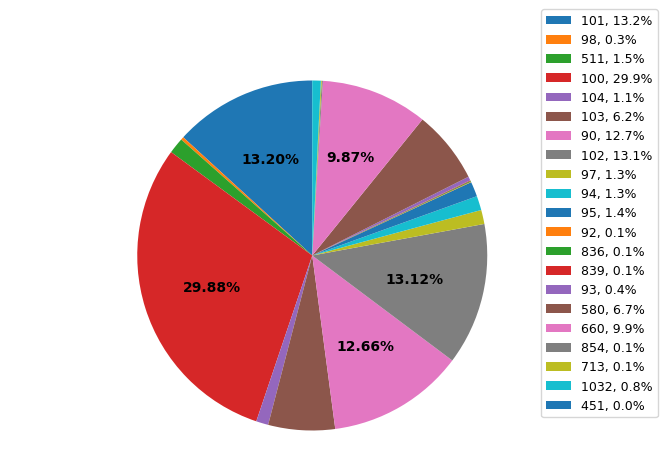

In [27]:
names= list(c.keys())[:21]
values = list(c.values())[:21]

def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

fig1, ax1 = plt.subplots(figsize=(6, 5))
_, _, autotexts = ax1.pie(values, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(values)

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(names, values)],
    prop={'size': 9},
    bbox_to_anchor=(1, 1),
    bbox_transform=fig1.transFigure)


plt.show()

In [28]:
#Action_ids duration

Please input the action_id you want to find the duration:  93


It takes approximately 3.7 hours to complete action 93


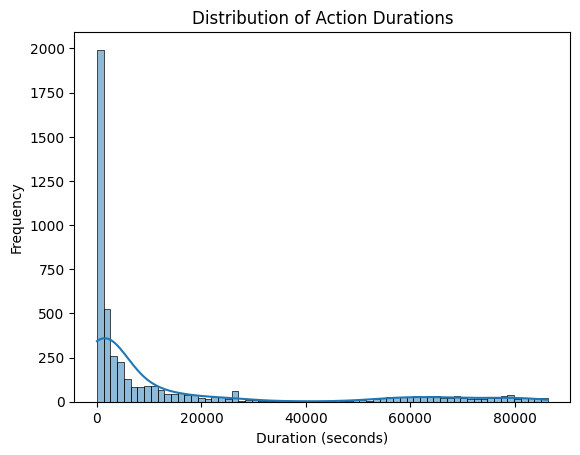

In [10]:
def string_to_datetime(tasks_data):
    date_format = '%Y-%m-%d %H:%M:%S.%f'

    action_name = int(input("Please input the action_id you want to find the duration: "))
    task_list = []
    action_list = []
    date_list = []

    for index, row in tasks_data.iterrows():
        task_list.append(row["task_id"])
        action_list.append(row["action_id"])
        date_list.append(row["action_date"])

    dates = list(zip(task_list, action_list, date_list))
    durations = []

    for i in range(1, len(dates)):
        if dates[i][1] == action_name and dates[i][0] == dates[i - 1][0]:
            duration = (datetime.strptime(dates[i][2], date_format) - datetime.strptime(dates[i - 1][2], date_format)).seconds
            durations.append(duration)

    if durations:
        average_time = sum(durations) / len(durations) / 3600
        print(f"It takes approximately {round(average_time, 2)} hours to complete action {action_name}")
    else:
        print(f"No duration found for action {action_name}")

    # Create a histogram using seaborn
    sns.histplot(durations, kde=True)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Action Durations')
    plt.show()


string_to_datetime(tasks)

In [ ]:
#Duration all action_ids

In [12]:
def avarage_datetime_dictonary(tasks_data):
    
    
    date_format = '%Y-%m-%d %H:%M:%S'
    action_list = []
    date_list = []
    task_list =[]
    action_name = []
    datetime_dictionary = {}
    
    for index, row in tasks_data.iterrows():
        
        action_list.append(row["action_id"])
        date_list.append(row["action_date"])
        task_list.append(row["task_id"])
      

    dates = list(zip(task_list, action_list, date_list))

    
    for action in range(len(dates)):
        if dates[action][1] not in action_name:
            action_name.append(dates[action][1])

            
    for j in action_name:
        counting_time = 0
        counting = 0
        
        for i in range(1, len(dates)):
            if j not in datetime_dictionary and dates[i][1] == j:
                if dates[i][0] == dates[i-1][0]:
                    counting += 1
                    result = (datetime.strptime(dates[i][2].split('.')[0], date_format) - datetime.strptime(dates[i-1][2].split('.')[0], date_format)).seconds
                    counting_time += result
                    
                    
        if counting != 0:
            average = counting_time / counting / 3600
            datetime_dictionary[j] = round(average, 2)
        

            
    return datetime_dictionary


average_durations = avarage_datetime_dictonary(tasks)
print(average_durations)

{98: 2.4, 511: 1.48, 100: 1.67, 104: 4.33, 103: 4.08, 90: 1.72, 102: 3.36, 97: 2.36, 94: 3.08, 95: 2.87, 92: 1.52, 836: 3.98, 839: 1.46, 93: 3.7, 580: 1.54, 660: 1.08, 854: 2.44, 713: 6.77, 1032: 13.04, 463: 1.0, 578: 7.75, 577: 3.13, 477: 0.29, 91: 3.46, 720: 3.17, 940: 4.46, 507: 12.53, 99: 3.77, 845: 2.67, 1044: 7.38, 1045: 2.55, 1046: 3.6, 1486: 4.09, 798: 3.53, 912: 1.71, 467: 0.07, 633: 0.01, 576: 0.04, 331: 5.44, 329: 3.1, 315: 10.7, 318: 5.18, 319: 11.21, 314: 7.25, 317: 3.34, 321: 1.88, 800: 0.83, 837: 2.07, 1318: 0.44, 1319: 0.01, 703: 1.16, 698: 0.06, 699: 3.59, 705: 8.17, 693: 3.64, 694: 10.56, 1033: 13.48, 1301: 10.64, 246: 0.56, 233: 0.01, 240: 0.01, 242: 0.05, 630: 8.3, 365: 2.12, 1313: 19.23, 846: 0.02, 414: 0.05, 430: 0.05, 424: 0.36, 1386: 3.2, 1384: 0.13, 1487: 2.07}


In [ ]:
#Bar chart about all duration

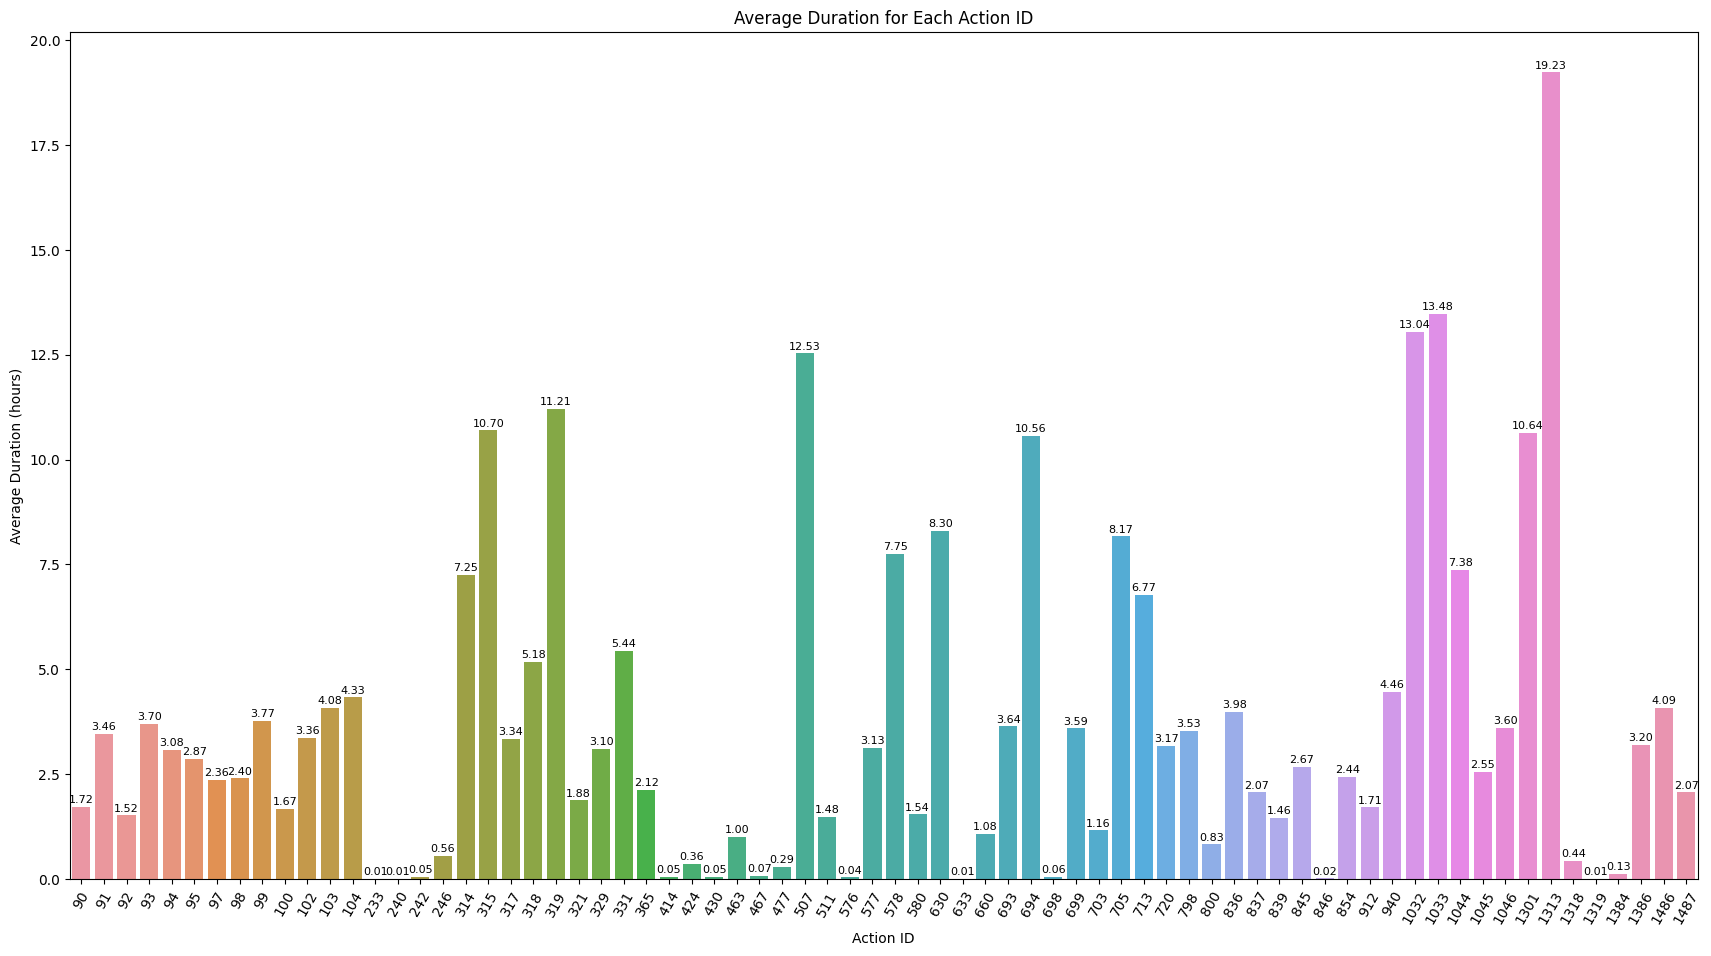

In [32]:
data = pd.DataFrame({'Action ID': list(average_durations.keys()), 'Average Duration (hours)': list(average_durations.values())})

plt.figure(figsize=(21, 11))
ax = sns.barplot(x='Action ID', y='Average Duration (hours)', data=data)

plt.xlabel('Action ID')
plt.ylabel('Average Duration (hours)')
plt.title('Average Duration for Each Action ID')
plt.xticks(rotation=60)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

In [ ]:
#Action_ids durations

In [20]:
def find_action_duration(task):
    date_format = '%Y-%m-%d %H:%M:%S.%f'

    action_name = int(input("Please input the action_id: "))
    durations = []

    for i in range(1, len(task)):
        if task.loc[i, 'action_id'] == action_name:
            duration = datetime.strptime(task.loc[i, 'action_date'], date_format) - datetime.strptime(task.loc[i - 1, 'action_date'], date_format)
            durations.append(duration.seconds)

    return durations

result = find_action_duration(tasks)
print("Action durations:", result)

Please input the action_id:  511


Action durations: [59, 9204, 20671, 46, 82, 23, 53, 2408, 144, 58, 54, 87, 79047, 86, 13, 178, 30, 863, 25, 2231, 47, 7670, 65, 89, 807, 36, 61, 3867, 46, 361, 1045, 854, 22862, 28, 481, 45, 36, 80693, 31, 17, 629, 1809, 1153, 70108, 76, 66685, 85580, 36, 71, 20816, 56895, 20, 71120, 5200, 110, 61017, 28, 35, 14, 53760, 4936, 640, 33, 124, 21, 100, 12, 351, 20, 475, 47, 89, 158, 22, 15, 1849, 1703, 33, 93, 14, 425, 10, 20, 12, 64283, 284, 24, 23101, 1381, 13, 18, 497, 14, 61, 26, 219, 95, 11000, 655, 118, 6244, 14, 28, 435, 81, 18, 21, 47, 556, 209, 227, 173, 16, 639, 118, 147, 59, 2266, 19, 42, 433, 75, 5563, 7601, 96, 22, 21, 29, 11, 67, 73, 154, 19, 8, 5, 20, 299, 43, 73232, 5071, 37, 20, 31, 696, 60, 1096, 57, 196, 448, 36, 982, 207, 18, 8, 20, 586, 107, 3466, 6, 48, 18, 8, 58214, 36, 28, 15, 18, 66, 15, 107, 40, 33, 51, 46, 21, 211, 19, 13, 17, 35, 12, 40, 24, 40, 16, 218, 217, 19, 573, 43, 52, 17, 763, 3066, 16, 766, 314, 6586, 14, 200, 513, 591, 34, 275, 12, 29, 19, 35, 1062, 7,

In [21]:
df = pd.DataFrame({'Duration': result})
fig = px.box(df, y='Duration')
fig.update_layout(
    title='Box Plot of Durations',
    xaxis_title='Action ID',
    yaxis_title='Duration'
)
fig.show()

In [ ]:
#Input action_id and action_performer_id

In [69]:
def find_action_duration(task):
    date_format = '%Y-%m-%d %H:%M:%S.%f'

    action_name = int(input("Please input the action_id: "))
    action_performer = int(input("Please input the performer: "))

    durations = []

    for i in range(1, len(task)):
        if task.loc[i, 'action_id'] == action_name and task.loc[i, 'action_performer_id'] == action_performer:
            duration = datetime.strptime(task.loc[i, 'action_date'], date_format) - datetime.strptime(task.loc[i - 1, 'action_date'], date_format)
            durations.append(duration.seconds)

    return durations
    
#Output results    
result = find_action_duration(tasks)
# result = result[:1197]
print(len(result))

Please input the action_id:  511
Please input the performer:  485


1740


In [83]:
cl_result = [x for x in result if x < 15]

In [78]:

df = pd.DataFrame({'Duration': cl_result})
fig = px.box(df, y='Duration')
fig.update_layout(
    title='Box Plot of Durations',
    xaxis_title='Action ID',
    yaxis_title='Duration'
)
fig.show()

In [71]:
def find_action_duration(task):
    date_format = '%Y-%m-%d %H:%M:%S.%f'

    action_name = int(input("Please input the action_id: "))
    action_performer = int(input("Please input the performer: "))

    durations = []

    for i in range(1, len(task)):
        if task.loc[i, 'action_id'] == action_name and task.loc[i, 'action_performer_id'] == action_performer:
            duration = datetime.strptime(task.loc[i, 'action_date'], date_format) - datetime.strptime(task.loc[i - 1, 'action_date'], date_format)
            durations.append(duration.seconds)

    return durations
    
#Output results    
res = find_action_duration(tasks)
print(len(res))

Please input the action_id:  511
Please input the performer:  558


1197


In [72]:
df = pd.DataFrame({'Duration': res})
fig = px.box(df, y='Duration')
fig.update_layout(
    title='Box Plot of Durations',
    xaxis_title='Action ID',
    yaxis_title='Duration'
)
fig.show()

In [65]:
df = {'Duration one': result, 'Duration two': res}
data = pd.DataFrame(df)
fig = px.box(data, y='Duration one', x='Duration two')
fig.update_layout(
    title='Box Plot of Durations',
    xaxis_title='Action ID',
    yaxis_title='Duration'
)
fig.show()


In [ ]:
#Counting action_performer_ids

In [ ]:
# def performer_counting(task_data):
#     counting = {}

#     for index,row in task_data.iterrows():
#         if row['action_performer_id'] in counting:
#             counting[row['action_performer_id']] += 1
#         else:
#             counting[row['action_performer_id']] = 1

#     max_count = 0
#     max_value = None
#     for row, count in counting.items():
#         if count > max_count:
#             max_count = count
#             max_value = row

#     counting = dict(sorted(counting.items(), key=lambda x:x[1], reverse=True))

#     return counting 


# performer_counting(tasks)

Please input name of the action you want to get frequency 511


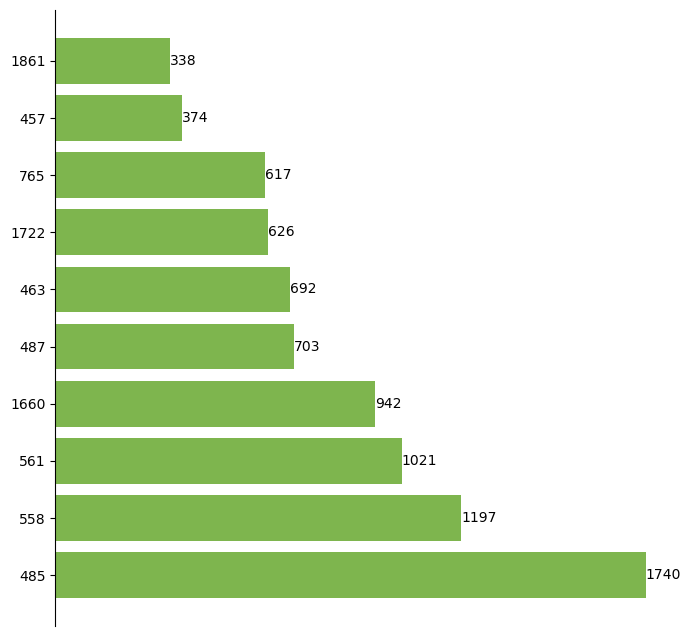

({485: 1740,
  558: 1197,
  561: 1021,
  1660: 942,
  487: 703,
  463: 692,
  1722: 626,
  765: 617,
  457: 374,
  1861: 338,
  1681: 314,
  450: 290,
  531: 281,
  554: 267,
  2008: 264,
  446: 263,
  1514: 256,
  1658: 256,
  819: 224,
  516: 217,
  920: 212,
  821: 209,
  442: 207,
  426: 205,
  410: 202,
  1378: 181,
  359: 180,
  120: 170,
  859: 169,
  465: 161,
  817: 155,
  552: 139,
  223: 127,
  544: 126,
  1216: 110,
  776: 108,
  1725: 107,
  1083: 97,
  467: 95,
  1776: 90,
  1084: 86,
  1199: 86,
  536: 86,
  1104: 85,
  1088: 84,
  469: 79,
  526: 75,
  534: 71,
  1504: 69,
  2143: 69,
  470: 68,
  1623: 65,
  1982: 64,
  287: 64,
  556: 61,
  965: 61,
  1154: 60,
  757: 59,
  1040: 59,
  351: 59,
  1601: 57,
  1609: 57,
  1109: 57,
  460: 52,
  1107: 50,
  472: 49,
  890: 49,
  1516: 47,
  483: 46,
  473: 45,
  553: 44,
  1015: 44,
  2: 43,
  1095: 43,
  576: 41,
  510: 39,
  323: 38,
  434: 38,
  193: 37,
  992: 37,
  349: 36,
  1201: 36,
  1618: 35,
  1497: 35,
  535:

In [68]:
def frequency(task_data):
    my_list = []
    name = "action_id"
    action = int(input("Please input name of the action you want to get frequency"))
    for index, row in task_data.iterrows():
        if row[name] == action:
            my_list.append(row["action_performer_id"])

    freq = {}
    for item in my_list:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1



    counts= sorted(freq.items(), key=lambda x:x[1], reverse=True)
    counts= dict(counts)

    #drawing plot

    z = list(counts.keys())[:10]
    x = []
    for i in z:
        x.append(str(i))

    y = list(counts.values())[:10]
    c = '#7eb54e'

    fig, ax = plt.subplots(figsize=(8,8))

    bars = plt.barh(x, y, color = c)

    ax.spines[['right', 'top', 'bottom']].set_visible(False)
    ax.xaxis.set_visible(False)

    ax.bar_label(bars)


    return counts, plt.show()

frequency(tasks)